In [ ]:
# importing libraries
import tensorflow as tf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import operator 
from operator import itemgetter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd 
import matplotlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
mnist = tf.keras.datasets.mnist #this is basically characters based on 28x28 size images of  0 to 9

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # load mnist data and split into training and testing dataset

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape # check the shape of the dataset

(60000, 28, 28)

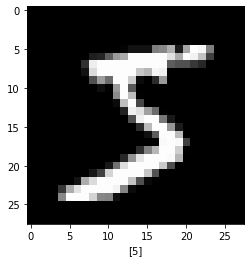

In [ ]:
# just check the graph how the data lookslike

plt.imshow(x_train[0], cmap = "gray")
plt.xlabel([y_train[0]]) # add the label of the image
plt.show() # plot the image

In [ ]:
# normalize the training and testing datasets
x_train = tf.keras.utils.normalize(x_train, axis = 1) 
x_test = tf.keras.utils.normalize(x_test, axis = 1)

### CNN Model:-

Reference: - https://medium.com/analytics-vidhya/hand-written-digit-recognition-using-cnn-classification-process-explanation-f6d75dcb72bb#:~:text=Hand-written%20Digit%20Recognition%20Using%20CNN%20Classification%20%28Process%20Explanation%29,...%206%20Achieved%20Results.%20...%207%20Conclusion.%20

In [ ]:
# build the model object
model = tf.keras.models.Sequential()

# add the flatten layer 
model.add(tf.keras.layers.Flatten())

# build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

# build the output layers
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [ ]:
# model is compiled using Adam optimization algorithm where this algorithm is used for training Deep Neural Networks (DNN)
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# take batch size and epochs 
batch_size = 64
epochs = 10

In [ ]:
# start training process using train datasets
model_log = model.fit(x = x_train, y = y_train, batch_size = batch_size, verbose = 1, epochs = epochs, validation_split = 0.3)

Epoch 1/10
657/657 [==============================] - 3s 4ms/step - loss: 0.3725 - accuracy: 0.8944 - val_loss: 0.1961 - val_accuracy: 0.9413
Epoch 2/10
657/657 [==============================] - 2s 3ms/step - loss: 0.1485 - accuracy: 0.9552 - val_loss: 0.1460 - val_accuracy: 0.9556
Epoch 3/10
657/657 [==============================] - 2s 3ms/step - loss: 0.1001 - accuracy: 0.9693 - val_loss: 0.1311 - val_accuracy: 0.9597
Epoch 4/10
657/657 [==============================] - 2s 3ms/step - loss: 0.0750 - accuracy: 0.9763 - val_loss: 0.1288 - val_accuracy: 0.9627
Epoch 5/10
657/657 [==============================] - 2s 3ms/step - loss: 0.0551 - accuracy: 0.9828 - val_loss: 0.1165 - val_accuracy: 0.9634
Epoch 6/10
657/657 [==============================] - 2s 3ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.1224 - val_accuracy: 0.9655
Epoch 7/10
657/657 [==============================] - 2s 3ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.1147 - val_accuracy: 0.9673
Epoch 

In [ ]:
# calculating model performance
loss, acc = model.evaluate(x = x_test, y = y_test)

# print out the model accuracy

print("\n Accuracy of test data", acc)


print("\n Loss of test data", loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.1290 - accuracy: 0.9648

 Accuracy of test data 0.9648000001907349

 Loss of test data 0.1290106624364853


In [ ]:
# reshaping the testing data
x_test = x_test.reshape(-1, 28, 28)
x_test.shape

(10000, 28, 28)

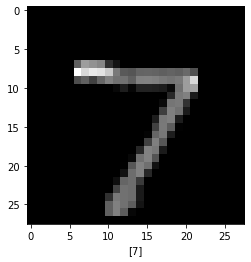

In [ ]:
# show the any image from  the test dataset
plt.imshow(x_test[0], cmap = "gray")
plt.xlabel([y_test[0]]) # add the label of the image
plt.show() # plot the image

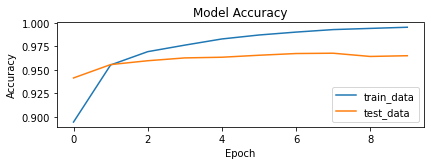

In [ ]:
# plotting the graph for the model accuracy
import os
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(model_log.history["accuracy"])
plt.plot(model_log.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train_data', "test_data"])
plt.tight_layout()


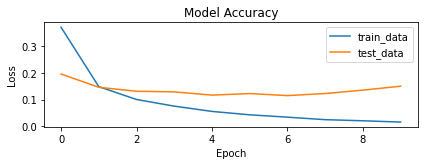

In [ ]:
# plotting the graph for the model loss
plt.subplot(2, 1, 1)
plt.plot(model_log.history["loss"])
plt.plot(model_log.history["val_loss"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train_data', "test_data"])
plt.tight_layout()

### Multilayer Perceptron

Reference:- http://corochann.com/mnist-training-with-multi-layer-perceptron-1149.html

Fully connected feedforward network

Hidden node = 100

Activation function = sigmoid

In [ ]:
#  reshape and normalize the input from 0-255 to 0-1
(a_train, b_train),(a_test, b_test) = mnist.load_data()
a_train = a_train.astype(np.float32).reshape((a_train.shape[0],28*28))/255.0
a_test = a_test.astype(np.float32).reshape((a_test.shape[0],28*28))/255.0

#### It's a problem of digit recognition. As a result, there are ten digits (0 to 9) to forecast, or ten classes. We can convert the vector of class integers into a binary matrix using a one-hot encoding of the class values.

In [ ]:
b_train = to_categorical(b_train)
b_test = to_categorical(b_test)
num_classes = b_test.shape[1]

In [ ]:
# creating a model
multilayer_perceptron = Sequential()
multilayer_perceptron.add(Dense (1000, input_dim = 784, activation = 'sigmoid'))
multilayer_perceptron.add(Dense (10, activation='sigmoid'))
multilayer_perceptron.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
multilayer_perceptron.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model 
mlp_model_log = multilayer_perceptron.fit(a_train, b_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split = 0.3)

Epoch 1/10
657/657 [==============================] - 5s 7ms/step - loss: 0.4105 - accuracy: 0.8827 - val_loss: 0.2727 - val_accuracy: 0.9212
Epoch 2/10
657/657 [==============================] - 5s 7ms/step - loss: 0.2446 - accuracy: 0.9270 - val_loss: 0.2246 - val_accuracy: 0.9357
Epoch 3/10
657/657 [==============================] - 5s 7ms/step - loss: 0.1826 - accuracy: 0.9460 - val_loss: 0.1752 - val_accuracy: 0.9508
Epoch 4/10
657/657 [==============================] - 5s 7ms/step - loss: 0.1380 - accuracy: 0.9595 - val_loss: 0.1499 - val_accuracy: 0.9568
Epoch 5/10
657/657 [==============================] - 5s 7ms/step - loss: 0.1070 - accuracy: 0.9684 - val_loss: 0.1270 - val_accuracy: 0.9631
Epoch 6/10
657/657 [==============================] - 5s 7ms/step - loss: 0.0848 - accuracy: 0.9749 - val_loss: 0.1134 - val_accuracy: 0.9671
Epoch 7/10
657/657 [==============================] - 5s 7ms/step - loss: 0.0667 - accuracy: 0.9809 - val_loss: 0.1119 - val_accuracy: 0.9658
Epoch 

In [ ]:
# check the accuracy of the multilayer perceptron
score = multilayer_perceptron.evaluate(a_test, b_test, verbose = 0)
print("Multilayer Perceptron Error: %.2f%%" % (100-score[0]*100))

Multilayer Perceptron Error: 92.22%


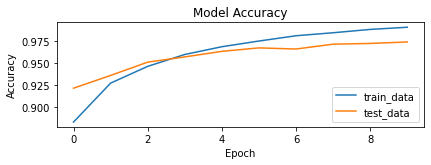

In [ ]:
# plotting the graph for the model accuracy
import os
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(mlp_model_log.history["accuracy"])
plt.plot(mlp_model_log.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train_data', "test_data"])
plt.tight_layout()

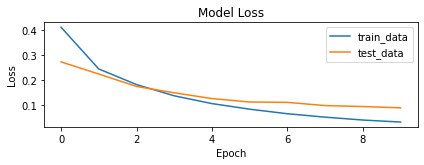

In [ ]:
# plotting the graph for the loss of the model
plt.subplot(2, 1, 1)
plt.plot(mlp_model_log.history["loss"])
plt.plot(mlp_model_log.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train_data', "test_data"])
plt.tight_layout()

### Feed Forward Neural Network

#### Reference: - https://www.youtube.com/watch?v=vT_0T8Pp1A8

In [ ]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data() 

In [ ]:
# creating a model
f_model=Sequential()
f_model.add(Flatten(input_shape=(28,28)))
f_model.add(Dense(512,activation='relu'))
f_model.add(Dense(256,activation='relu'))
f_model.add(Dense(128,activation='relu'))
f_model.add(Dense(64,activation='relu'))
f_model.add(Dense(10,activation='softmax'))
f_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
f_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
________________________________________________

In [ ]:
#It's a problem of digit recognition. As a result, there are ten digits (0 to 9) to forecast, or ten classes. We can convert the vector of 
#class integers into a binary matrix using a one-hot encoding of the class values.

NY_train = to_categorical(Y_train)
NY_test = to_categorical(Y_test)

print(Y_train[:10])
print(NY_train[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
NX_train = X_train/255
NX_test = X_test/255

In [ ]:
# fit the model using training data using batch size of 64 an epochs 10
f_model_model_log = f_model.fit(NX_train,NY_train,epochs=epochs, batch_size=batch_size, verbose=1, validation_split = 0.3 )

Epoch 1/10
657/657 [==============================] - 5s 7ms/step - loss: 0.2520 - accuracy: 0.9246 - val_loss: 0.1404 - val_accuracy: 0.9582
Epoch 2/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0976 - accuracy: 0.9700 - val_loss: 0.1297 - val_accuracy: 0.9606
Epoch 3/10
657/657 [==============================] - 4s 7ms/step - loss: 0.0696 - accuracy: 0.9785 - val_loss: 0.1404 - val_accuracy: 0.9599
Epoch 4/10
657/657 [==============================] - 4s 7ms/step - loss: 0.0514 - accuracy: 0.9838 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 5/10
657/657 [==============================] - 4s 7ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.1193 - val_accuracy: 0.9697
Epoch 6/10
657/657 [==============================] - 4s 7ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.1018 - val_accuracy: 0.9737
Epoch 7/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.1029 - val_accuracy: 0.9743
Epoch 

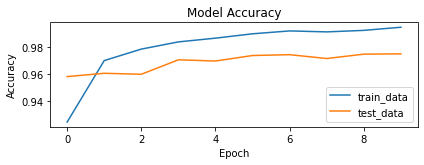

In [ ]:
# plotting the graph for the model accuracy
import os
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f_model_model_log.history["accuracy"])
plt.plot(f_model_model_log.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train_data', "test_data"])
plt.tight_layout()

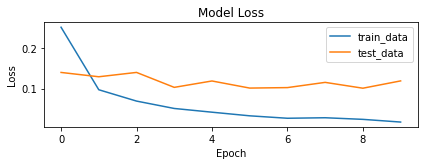

In [ ]:
# plotting the graph for the model loss
import os
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f_model_model_log.history["loss"])
plt.plot(f_model_model_log.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train_data', "test_data"])
plt.tight_layout()

In [ ]:
# evaluating the model 
f_model.evaluate(NX_test,NY_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9761


[0.09403081983327866, 0.9761000275611877]